<a href="https://colab.research.google.com/github/GeekBoySupreme/Colab_Notebooks/blob/master/style_transfer_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13335184 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15540751205212488914
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3538794505684262523
physical_device_desc: "device: XLA_CPU device"
]


**Download Dependencies**

In [2]:
#Download neural_style.py
#This code originates from https://github.com/cysmith/neural-style-tf
!wget --output-document=neural_style.py 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py'
 
!cat ./wget-log  
  
#Download ImageNet VGG Very Deep
#VGG-VD models from the Very Deep Convolutional Networks for Large-Scale Visual Recognition project.
!wget --output-document=imagenet-vgg-verydeep-19.mat 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat'
 
!cat ./wget-log.1

--2019-09-10 15:33:11--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 2607:f8b0:4001:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30650 (30K) [text/x-python-script]
Saving to: ‘neural_style.py’

neural_style.py     100%[===================>]  29.93K  --.-KB/s    in 0s      

2019-09-10 15:33:11 (114 MB/s) - ‘neural_style.py’ saved [30650/30650]

cat: ./wget-log: No such file or directory
--2019-09-10 15:33:16--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 2

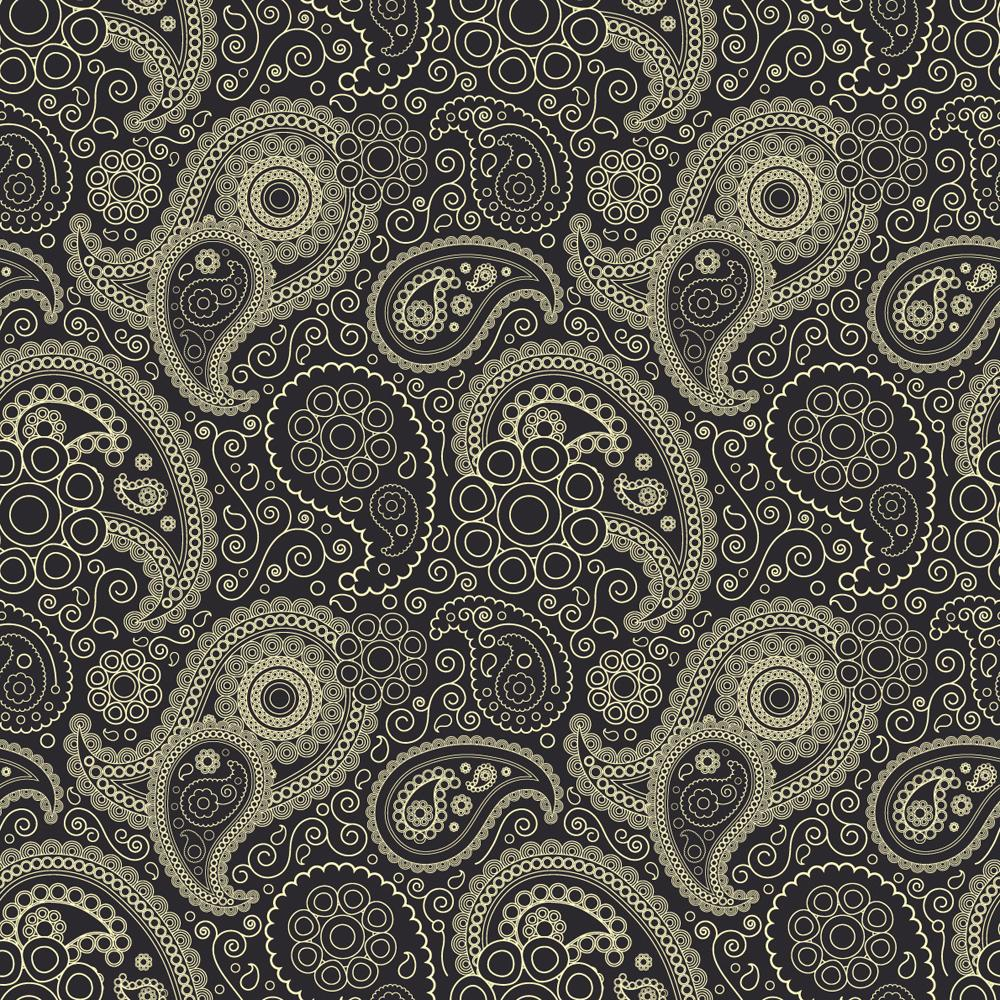

In [4]:
import re
from IPython.display import Image
import urllib.request

def download_image_from_URL(imageURL):
  imageName = re.search('[a-z0-9\-]+\.(jpe?g|png|gif|bmp)', imageURL, re.IGNORECASE)
  imageName = imageName.group(0)
  urllib.request.urlretrieve(imageURL, imageName)
  imagePath = "./" + imageName
  return imagePath
   
#Download Image from URL and Store Path in Variable

#Content image model.jpg
imageDownload1 = download_image_from_URL("https://storage.googleapis.com/marketing-files/yt-back.png")


#Style image polygon-2.jpg
imageDownload3 = download_image_from_URL("https://i.stack.imgur.com/ayYiJ.jpg")

#Display Local Image
Image(imageDownload3)              

#Stylize an image

In [5]:
from IPython.display import Image


! python neural_style.py --content_img_dir ./ \
                       --content_img yt-back.png \
                       --style_imgs_dir ./ \
                       --style_imgs ayYiJ.jpg \
                       --style_imgs_weights 1  \
                       --max_iterations 10 \
                       --max_size 2600 \
                       --img_name output \
                       --content_weight 1 \
                       --original_colors \
                       --device /gpu:0 \
                       --img_output_dir ./ \
                       --verbose;
                    
# Print Final Image
Image('./output/output.png')


---- RENDERING SINGLE IMAGE ----


2019-09-10 15:37:06.639044: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-09-10 15:37:06.639379: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1506a00 executing computations on platform Host. Devices:
2019-09-10 15:37:06.639428: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>

BUILDING VGG-19 NETWORK
loading model weights...
constructing layers...
LAYER GROUP 1
--conv1_1 | shape=(1, 1440, 2560, 64) | weights_shape=(3, 3, 3, 64)
--relu1_1 | shape=(1, 1440, 2560, 64) | bias_shape=(64,)
--conv1_2 | shape=(1, 1440, 2560, 64) | weights_shape=(3, 3, 64, 64)
--relu1_2 | shape=(1, 1440, 2560, 64) | bias_shape=(64,)

--pool1   | shape=(1, 720, 1280, 64)
LAYER GROUP 2
--conv2_1 | shape=(1, 720, 1280, 128) | weights_shape=(3, 3, 64, 128)
--relu2_1 | shape=(1, 720, 1280, 128) | bias_shape=(128,)
--conv2_2 | shape=(1, 720, 1280, 128) | weights_s